In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [2]:
# DATA Load
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# CNN Layer 에 Input 가능한 형태로 변경
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test,-1)

print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)

X_train shape : (60000, 28, 28, 1)
y_train shape : (60000,)


In [4]:
# Y_train 을 이용해 one hot encoding 
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [5]:
help(keras.layers.Conv2D)

Help on class Conv2D in module keras.layers.convolutional.conv2d:

class Conv2D(keras.layers.convolutional.base_conv.Conv)
 |  Conv2D(*args, **kwargs)
 |  
 |  2D convolution layer (e.g. spatial convolution over images).
 |  
 |  This layer creates a convolution kernel that is convolved
 |  with the layer input to produce a tensor of
 |  outputs. If `use_bias` is True,
 |  a bias vector is created and added to the outputs. Finally, if
 |  `activation` is not `None`, it is applied to the outputs as well.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers or `None`, does not include the sample axis),
 |  e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
 |  in `data_format="channels_last"`. You can use `None` when
 |  a dimension has variable size.
 |  
 |  Examples:
 |  
 |  >>> # The inputs are 28x28 RGB images with `channels_last` and the batch
 |  >>> # size is 4.
 |  >>> input_shape = (4, 28, 28

In [6]:
# model 생성 
# model 을 자동으로 생성할수는 없을까? 자동화 방법은 ?
# input_shape=(28, 28, 1) 
model = keras.Sequential()
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(128, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

In [8]:
history=model.fit(X_train, Y_train, batch_size=128, epochs=4, validation_split= 0.2) # validation_split validation data를 X_train의 20% 를 사용해 측정

Epoch 1/4
375/375 [==============================] - 12s 10ms/step - loss: 0.5791 - accuracy: 0.9188 - val_loss: 0.0749 - val_accuracy: 0.9795
Epoch 2/4
375/375 [==============================] - 3s 9ms/step - loss: 0.0677 - accuracy: 0.9786 - val_loss: 0.0660 - val_accuracy: 0.9803
Epoch 3/4
375/375 [==============================] - 3s 9ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0585 - val_accuracy: 0.9822
Epoch 4/4
375/375 [==============================] - 3s 9ms/step - loss: 0.0336 - accuracy: 0.9893 - val_loss: 0.0714 - val_accuracy: 0.9807


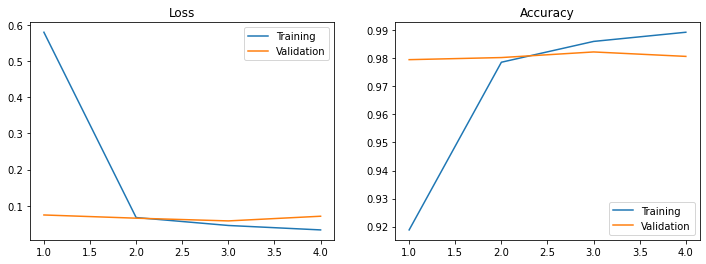

In [9]:
# history 의 결과를 이용해 loss 와 val_loss 를 시각화 한다. 
def plot_loss_acc(history, epoch):

    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()

plot_loss_acc(history, 4)

In [10]:
# 모델 구조
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [11]:
# 입력 텐서 형태 , 출력 텐서 형태, model 중간 계측의 layer 객체를 확인할 수 있다.  
model.input, model.output, model.layers

(<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>,
 <KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_2')>,
  <keras.layers.core.dense.Dense at 0x7f37902db8e0>])

In [12]:
# 첫번째 레이어 선택
model.layers[0]

In [14]:
# model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu',input_shape=(28, 28, 1)))
# model.add(keras.layers.MaxPooling2D(pool_size=2))

# 첫번째 레이어 입력, 첫번째 레이어 출력

model.layers[0].input,
model.layers[0].output # 28x28 -> convolution(kernel =(3,3), strid = 1) -> 26x26, # 26x26인 결과가 64개 출력된다. 

(<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>,
 <KerasTensor: shape=(None, 26, 26, 64) dtype=float32 (created by layer 'conv2d')>)

In [18]:
# 첫번째 레이어 가중치
# (3,3,1, 64); 3x3 kernel 1개 64개 존재 의 갯수만큼의 가중치 존재
model.layers[0].weights[0]

<tf.Variable 'conv2d/kernel:0' shape=(3, 3, 1, 64) dtype=float32, numpy=
array([[[[ 6.56895041e-02, -3.57080847e-02, -1.05937243e-01,
          -1.05354458e-01,  1.91047490e-02,  2.57835723e-02,
          -1.52573697e-02, -3.43190692e-02,  7.56721050e-02,
           3.83303547e-03,  2.59668706e-03,  4.26875539e-02,
           5.39787449e-02, -8.14273134e-02, -5.81072718e-02,
          -3.97349186e-02, -1.01219602e-01, -8.74174573e-03,
          -1.27269076e-02,  6.43151924e-02,  5.88850863e-02,
          -7.48853534e-02,  7.55294859e-02,  2.33397949e-02,
           6.08476996e-02, -1.15381014e-02, -5.37063070e-02,
           2.78712101e-02, -1.87954283e-03,  6.92266971e-02,
          -4.95422445e-02,  1.76561661e-02,  4.67741154e-02,
          -3.06140333e-02,  7.99923316e-02,  6.32955655e-02,
          -7.70120695e-02,  1.85668655e-02, -5.49163334e-02,
           8.40703845e-02, -6.58320263e-02,  2.56744009e-02,
          -3.01424824e-02,  7.05499500e-02, -3.17495093e-02,
          -1

In [22]:
# bias 확인
model.layers[0].weights[1] # 64개의 kernel에 대한 가중치 64개 존재 

<tf.Variable 'conv2d/bias:0' shape=(64,) dtype=float32, numpy=
array([-0.0157714 , -0.0149633 ,  0.00815861, -0.01022599, -0.01900163,
       -0.00688411, -0.02395635, -0.00443196,  0.00679307, -0.00858802,
       -0.00362232, -0.01542765, -0.01382631,  0.00719407,  0.00720057,
       -0.01927758, -0.03208808, -0.0029601 , -0.01116731, -0.01474037,
       -0.00635503, -0.0072626 , -0.02769677, -0.01473032, -0.01271787,
       -0.02492924, -0.00746398, -0.01271406, -0.00495273, -0.02772845,
       -0.01840999, -0.00322933, -0.01776954, -0.00441466, -0.00851808,
       -0.02384816, -0.01029084, -0.02766394, -0.00355906, -0.0091159 ,
       -0.01226197, -0.001089  , -0.00538968, -0.00909628,  0.01847345,
       -0.00404434, -0.0140885 , -0.00856241,  0.0129265 , -0.01032659,
       -0.00588637, -0.01510116, -0.0140193 , -0.01131099, -0.02014409,
        0.01349198, -0.00674503, -0.00503707, -0.01314489, -0.00791253,
       -0.02529087, -0.02705359, -0.02080058,  0.00016838], dtype=float32

# 중간층 시각화

In [23]:
 model.layers

In [24]:
from tensorflow.keras import models
# 중간층 model 생성

layer_outputs = [layer.output for layer in model.layers[:4]] # model.layers[:4] 상위 4개의 layer를 추출 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) #상위 4개의 model을 이용해 새로운 model을 만든다. 

In [25]:
activation_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
Total params: 74,496
Trainable params: 74,496
Non-trainable p

In [27]:
# 입력할 image를 선택
image = np.expand_dims(X_train[4], 0)
image.shape #image를 model에 input 해주기 위해 차원을 늘려줌

(1, 28, 28, 1)

In [33]:
# np.argmax(model.predict(image)) # 원래 model의 출력값
activations = activation_model.predict(image) # 이미 학습된 model layer를 이용해 model 생성후 결과만 확인
# activations

1/1 [==============================] - 0s 15ms/step


In [35]:
first_layer_activation = activations[0]
first_layer_activation.shape # 64개의 결과 

(1, 26, 26, 64)

In [40]:
first_layer_activation[0,:,:,1].shape

(26, 26)

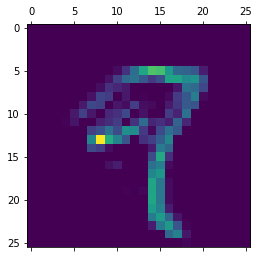

In [44]:
plt.matshow(first_layer_activation[0,:,:,6]) # matshow 는 수치 데이터를 시각화 해준다. 

<ipython-input-45-7f9384f7c672>:20: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


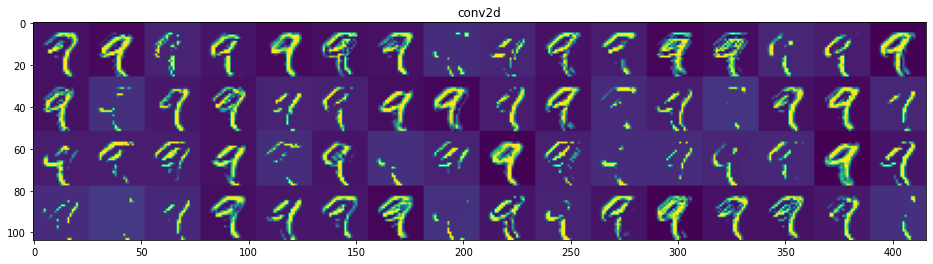

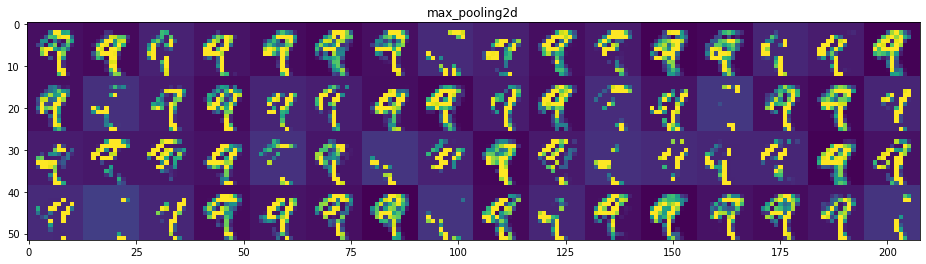

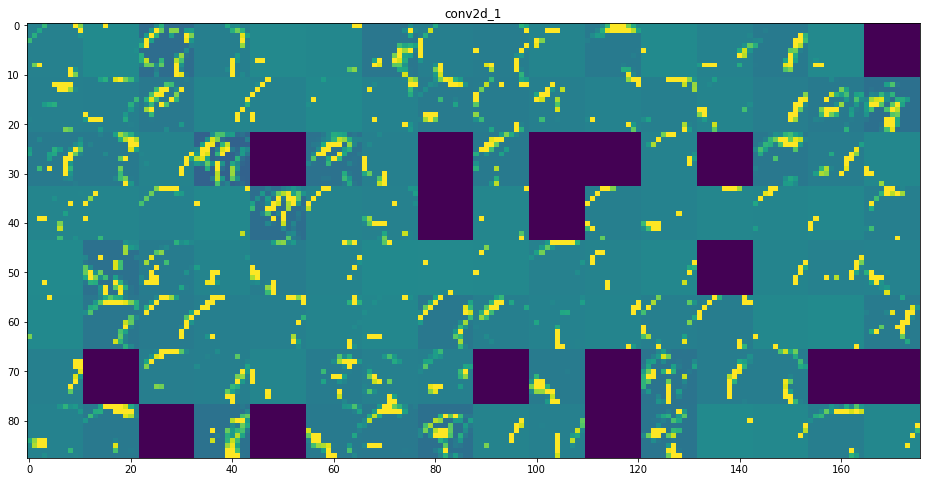

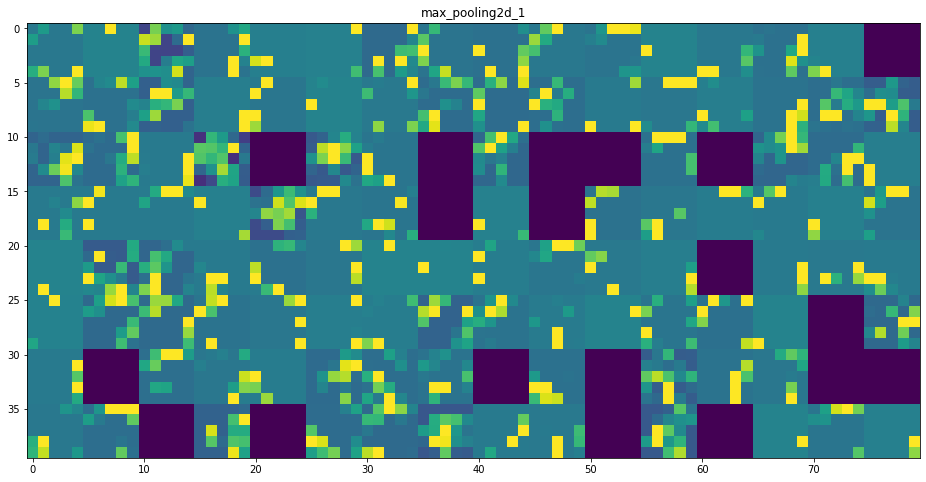

In [45]:
#layer의 이름 그래프 제목으로 사용
layer_names = []
layer_outputs = [layer.output for layer in model.layers[:4]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
for layer in model.layers[:4]:
    layer_names.append(layer.name)

images_per_row = 16

# feature map 생성
for layer_name, layer_activation in zip(layer_names, activations):
    # feature map 에 적용되는 feature의 갯수
    n_features = layer_activation.shape[-1]
    
    # feature map 의 size 는 (1, size, size, n_features)
    size = layer_activation.shape[1]

    # activation chennel(layer) 을 위한 1개 image grid size
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    # 각 activation layer 를 1개의 grid image에 집어 넣는다. 
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image
    
    # image grid 출력 
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()